**Talidong, Honey Grace S.**. </br>
**BSDS 4A**

# **Auto-Regressive Integrated Average Model - ARIMA**

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

from itertools import product

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
plt.rcParams['figure.figsize'] = [10, 7.5]

**Diagnosing the Dataset**

In [ ]:
data = pd.read_csv('Sunspots.csv')
data = data[3192:]
data = data.drop("Unnamed: 0",axis=1)
data = data.reset_index(drop=True)
data.head() #looking at some datapoints of the csv

,Date,Monthly Mean Total Sunspot Number
0,2015-01-31,93.0
1,2015-02-28,66.7
2,2015-03-31,54.5
3,2015-04-30,75.3
4,2015-05-31,88.8


**Visualizing the Dataset**

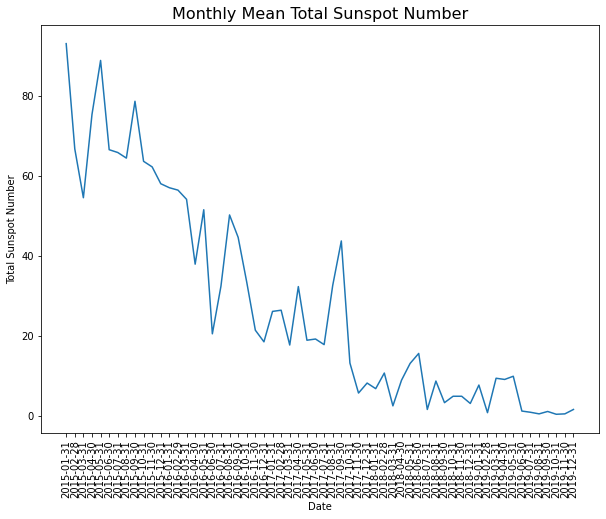

In [ ]:
plt.plot(data['Date'], data['Monthly Mean Total Sunspot Number'])
plt.title('Monthly Mean Total Sunspot Number', size = 16)
plt.ylabel('Total Sunspot Number')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.show()

**Plotting the ACF and PACF of the Dataset**

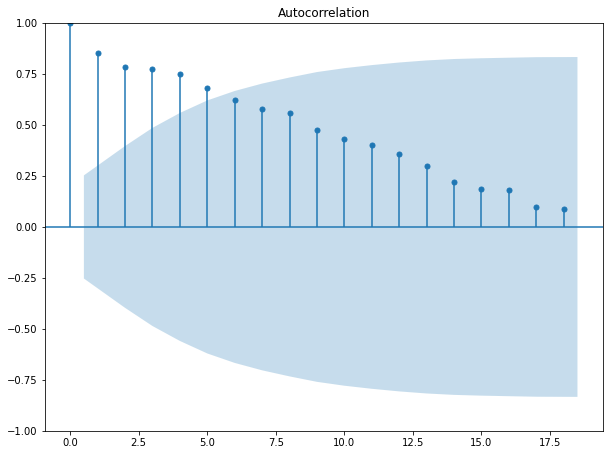

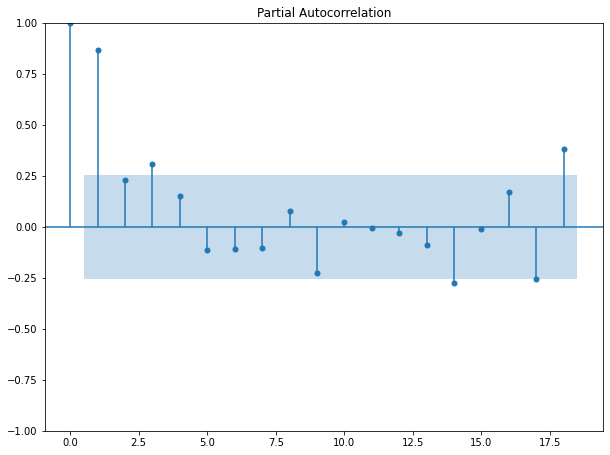

In [ ]:
plot_acf(data['Monthly Mean Total Sunspot Number']);
plot_pacf(data['Monthly Mean Total Sunspot Number']);

**Checking for Stationarity using Adfuller Test**

In [ ]:
ad_fuller_result = adfuller(data['Monthly Mean Total Sunspot Number'])

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -2.144182356442797
p-value: 0.2271235726729109


**Differencing using Log Differencing**

In [ ]:
data['data_tr_1'] = np.log(data['Monthly Mean Total Sunspot Number'])
data['data_tr_1'] = data['data_tr_1'].diff()

data.head(10)

,Date,Monthly Mean Total Sunspot Number,data_tr_1
0,2015-01-31,93.0,NaN
1,2015-02-28,66.7,-0.332395
2,2015-03-31,54.5,-0.202004
3,2015-04-30,75.3,0.323279
4,2015-05-31,88.8,0.164907
5,2015-06-30,66.5,-0.289185
6,2015-07-31,65.8,-0.010582
7,2015-08-31,64.4,-0.021506
8,2015-09-30,78.6,0.199258
9,2015-10-31,63.6,-0.211758


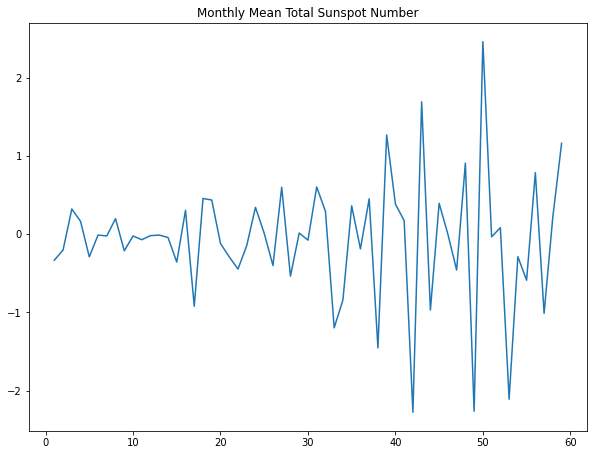

In [ ]:
plt.plot(data['data_tr_1'])
plt.title("Monthly Mean Total Sunspot Number")
plt.show()

**Checking for Stationarity using Adfuller Test**

In [ ]:
ad_fuller_result = adfuller(data['data_tr_1'][1:])

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -4.30167125592425
p-value: 0.0004412614581080216


**Plotting the ACF and PACF of the Dataset**

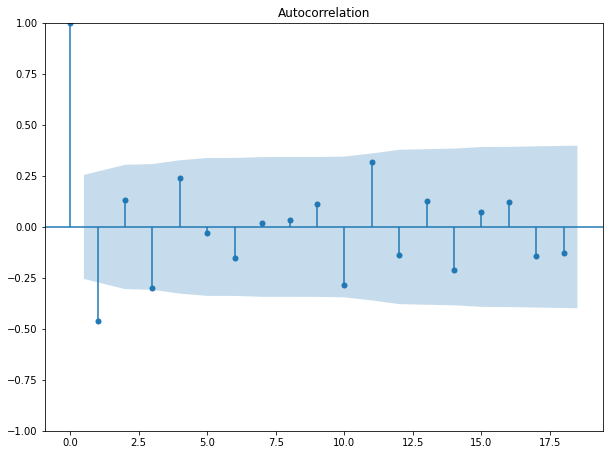

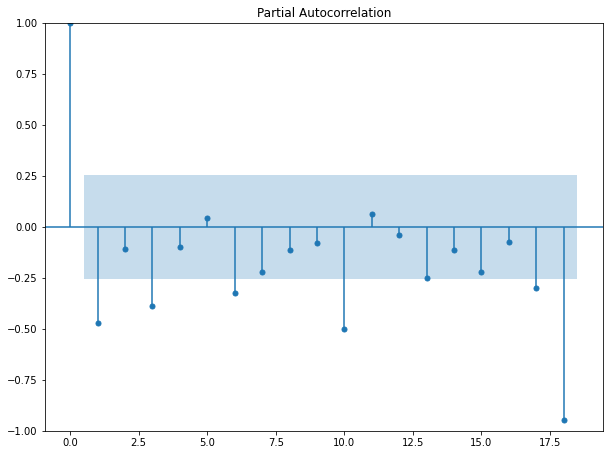

In [ ]:
plot_acf(data['data_tr_1'][1:]);
plot_pacf(data['data_tr_1'][1:]);

**Finding the optimal ARIMA Model**

In [ ]:
def optimize_ARIMA(endog, order_list):
    """
        Return dataframe with parameters and corresponding AIC
        
        order_list - list with (p, d, q) tuples
        endog - the observed variable
    """
    
    #list that will contain the results of every ARIMA model (p,d,q)
    results = []
    
    #tqdm is a timer and progress bar (for any programmer's sanity)
    #this loop will create the 
    for order in tqdm_notebook(order_list):
        
        # will create a model based on provided `order_list`
        try: 
            model = SARIMAX(endog, order=order, simple_differencing=False).fit(disp=False)
        
        #will just continue if it encounters an error (a try clause is always paired with except)
        except:
            continue
        
        #calculates the aic value of the model
        aic = model.aic
        
        #appends a list containing the order with its respective aic value
        results.append([order, aic])
    
    #converts the `results` list into a dataframe
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p, d, q)', 'AIC']
    
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    #returns the summary df containing all the salient information
    return result_df

**Setting up the set of values to consider for `optimize_ARIMA`**

In [ ]:
list(range(0, 10, 1))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
# list(parameters_list)

In [ ]:
#p values to test
ps = range(0, 10, 1)

#constant differencing value d
d = 1

#q values to test
qs = range(0, 10, 1)

# Create a list with all possible combination of parameters
parameters = product(ps, qs) #the product function will create all possible combinations of p and q to evaluate
parameters_list = list(parameters)

#save the combinations in an empty list
order_list = []

#create a tuple for each possible combinationn and insert the constant differencing value d = 1
for each in parameters_list:
    each = list(each)
    each.insert(1, 1)
    each = tuple(each)
    order_list.append(each)

#display the first ten values in the order list
order_list[:10]

[(0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 1, 6),
 (0, 1, 7),
 (0, 1, 8),
 (0, 1, 9)]

In [ ]:
len(order_list)

100

**Running the Function**

In [ ]:
data['Monthly Mean Total Sunspot Number']

0     93.0
1     66.7
2     54.5
3     75.3
4     88.8
5     66.5
6     65.8
7     64.4
8     78.6
9     63.6
10    62.2
11    58.0
12    57.0
13    56.4
14    54.1
15    37.9
16    51.5
17    20.5
18    32.4
19    50.2
20    44.6
21    33.4
22    21.4
23    18.5
24    26.1
25    26.4
26    17.7
27    32.3
28    18.9
29    19.2
30    17.8
31    32.6
32    43.7
33    13.2
34     5.7
35     8.2
36     6.8
37    10.7
38     2.5
39     8.9
40    13.1
41    15.6
42     1.6
43     8.7
44     3.3
45     4.9
46     4.9
47     3.1
48     7.7
49     0.8
50     9.4
51     9.1
52     9.9
53     1.2
54     0.9
55     0.5
56     1.1
57     0.4
58     0.5
59     1.6
Name: Monthly Mean Total Sunspot Number, dtype: float64

In [ ]:
result_df = optimize_ARIMA(data['Monthly Mean Total Sunspot Number'], order_list)
result_df

  0%|          | 0/100 [00:00<?, ?it/s]

,"(p, d, q)",AIC
0,"(3, 1, 4)",434.968990
1,"(2, 1, 3)",437.385315
2,"(4, 1, 4)",437.718861
3,"(5, 1, 6)",438.215459
4,"(5, 1, 7)",438.618452
...,...,...
95,"(5, 1, 9)",453.049449
96,"(2, 1, 1)",455.173180
97,"(1, 1, 7)",463.792455
98,"(0, 1, 7)",465.418484


In [ ]:
best_model = SARIMAX(data['Monthly Mean Total Sunspot Number'], order=(6,1,3), simple_differencing=False)
res = best_model.fit(disp=False)
print(res.summary())

                                       SARIMAX Results                                       
Dep. Variable:     Monthly Mean Total Sunspot Number   No. Observations:                   60
Model:                              SARIMAX(6, 1, 3)   Log Likelihood                -212.323
Date:                               Mon, 06 Dec 2021   AIC                            444.646
Time:                                       18:35:05   BIC                            465.422
Sample:                                            0   HQIC                           452.756
                                                - 60                                         
Covariance Type:                                 opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9633      0.147     -6.558      0.000      -1.251      -0.675
ar.L2      

**Model Diagnostics (Residual Report)**

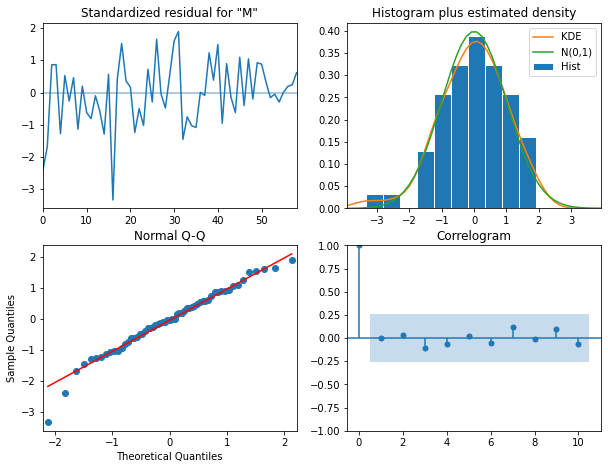

In [ ]:
res.plot_diagnostics();

**Making the  Predictions**

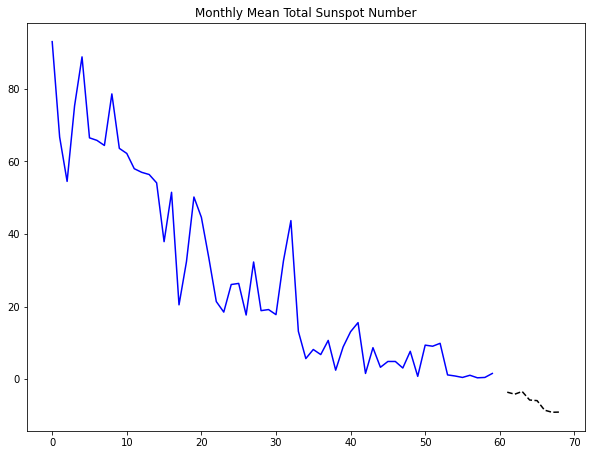

In [ ]:
n_forecast = 8 #Lets say we want to forecast 8 quarters of data in the future
predict = res.get_prediction(end=best_model.nobs + n_forecast)
idx = np.arange(len(predict.predicted_mean))

#visualize the predictions with respect ot historical data (use different markers)
fig, ax = plt.subplots()
ax.plot(data['Monthly Mean Total Sunspot Number'], 'blue')
ax.plot(idx[-n_forecast:], predict.predicted_mean[-n_forecast:], 'k--')

ax.set(title='Monthly Mean Total Sunspot Number')
plt.show()

**Making the dataframe of predictions**

In [ ]:
data['model'] = predict.predicted_mean
data.head(15)

,Date,Monthly Mean Total Sunspot Number,data_tr_1,model
0,2015-01-31,93.0,NaN,0.000000
1,2015-02-28,66.7,-0.332395,92.997588
2,2015-03-31,54.5,-0.202004,72.387387
3,2015-04-30,75.3,0.323279,66.582428
4,2015-05-31,88.8,0.164907,80.461009
5,2015-06-30,66.5,-0.289185,78.781438
6,2015-07-31,65.8,-0.010582,60.759230
7,2015-08-31,64.4,-0.021506,66.862664
8,2015-09-30,78.6,0.199258,74.284376
9,2015-10-31,63.6,-0.211758,73.976011


**Evaluating the model using RMSE**

In [ ]:
from numpy import sqrt

mse = mean_squared_error(data['Monthly Mean Total Sunspot Number'][1:], data['model'][1:])
rmse = sqrt(mse)
print(f'RMSE: {rmse}')

RMSE: 9.141900211387213
